![header](../header.png)

# Assignment 00 - Python, Linear Algebra, Optimization (12 points)
<span style='color:red'> Due date: 18.05.2021 23:59</span>

As an introduction to the assignments, we will start with a few basic Python operations and concepts. If anything is unlcear or if you find errors, feel free to post in the forum set up in Ilias or in the WebEx live session.

_You can submit incomplete assignments that don't validate_. If a test cell validates correctly, you will get the points.

**This assignment is optional**, but the points you get here will count towards the 80% necessary to pass.

## Operators (1 point)
In the lecture, we haven't talked about the operators `//`and `%`. Use the following cell to check what they do using different numbers:

In [1]:
a = 317
b = 17

print(a // b)
print(a % b)

18
11


Now that you know what these operators produce, you should see how you can use the results and the value of variable `b` to reconstruct number `a`. 

Write a function that takes as input the result of operation `//` called `intdiv`, the result of operation `%` called `mod` and number `b`. It should calculate number `a` and `return` the result:

In [2]:
def reconstruct(intdiv, mod, b):
    ### BEGIN SOLUTION
    return intdiv * b + mod
    ### END SOLUTION

The cell above contains a comment saying `### YOUR SOLUTION HERE` and a `NotImplemented` exception, both of which you can delete, so you can place your solution there.

You can test your function in the following cell:

In [3]:
a = 317
b = 17

result = reconstruct(a // b, a % b, b)
print(result)

317


The following cell contains tests. These will be used to determine if you solved the problem correctly (or creatively tricked the system). Taking a look at them might give you some hints about what is expected here, but sometimes some of the tests, or all of them, will be hidden.

When the check above yields the correct number, execute the test cell below to see if your function does the correct thing:

In [4]:
assert reconstruct(317 // 17, 317 % 17, 17) == 317
import random as r
import math as m
a = m.floor(100*r.random())
b = m.floor(100*r.random())
assert reconstruct(a // b, a % b, b) == a

If anything went wrong, the above cell will throw an `AssertionError` and show you which test failed. Take a good look at it to get some hints as to what went wrong. Always make sure your functions are as general as possible.

## Classes (5 points)
Although you won't have to use object-oriented programming during the course, it makes sense to understand roughly what classes do and how they work. We will use an example from FEM here and try to think of it in an object-oriented way.

In FEM, you describe a model using **nodes** and **elements** in a **mesh**. A mesh consists of nodes, which are arranged in elements. We will constrain our analysis to elements here for brevity's sake. Two classes are needed here, `Node` and `Element`. Remember that a class has attributes (things it know) and methods (actions it can take). Additionally, elements _have_ nodes associated with it, so the two need to be connected somehow. We will implement a very rudimentary version of that concept here.

Implement a `Node` class. It should have as an attribute a `list` of the coordinates `x_coord` and `y_coord`, that describes its position in the mesh. Assume a 2d mesh, so you'll only need to save two coordinates per node.<br />
As methods, the node should be able to print its own coordinates, and to add a displacement to its coordinates.

Use the following skeleton code:

In [14]:
class Node():
    def __init__(self, x_coord, y_coord):
        # self.coordinates = [ ?? ]
        ### BEGIN SOLUTION 
        self.coordinates = [x_coord, y_coord]
        ### END SOLUTION
        
    def print_coordinates(self):
        # print( ?? )
        ### BEGIN SOLUTION
        print(self.coordinates, "")
        ### END SOLUTION
            
    def add_displacement(self, x_disp, y_disp):
        # self.coordinates[ ?? ] += ??
        ### BEGIN SOLUTION
        self.coordinates[0] += x_disp
        self.coordinates[1] += y_disp
        ### END SOLUTION
        

Check that your class does what you expect below:

In [15]:
node1 = Node(0.0, 0.0)
node2 = Node(0.0, 1.0)
node3 = Node(1.0, 1.0)
node4 = Node(1.0, 0.0)

node2.print_coordinates()
node2.add_displacement(0.1, 0.2)
node2.print_coordinates()

[0.0, 1.0] 
[0.1, 1.2] 


In [16]:
testnode = Node(0.5, 0.5)
assert type(testnode.coordinates) == type([])

In [17]:
testnode = Node(-0.8, 0.8)
testnode2 = Node(-0.8, 0.8)
testnode2.add_displacement(0.3, 0.7)
assert testnode2.coordinates == [testnode.coordinates[0] + 0.3, testnode.coordinates[1] + 0.7]

Now, write an `Element` class that is instanciated empty, but can save a list of nodes. For adding a node, write a method `add_node` that takes a `node` instance and appends it to the list of nodes. Additionally, write a method that iterates over all nodes of the element and prints their coordinates, using the `print_coordinates()` method from each node. <br />
For later plotting, also write a function that returns a _list_ of all nodal coordinates called `get_nodal_coordinates()`. The list should look like this in the end: `[[x-coordinate_of_node1, y-coordinate_of_node1], [x-coordinate_of_node2, y-coordinate_of_node2], ...]`.

Use the following skeleton code:

In [9]:
class Element():
    def __init__(self):
        self.nodes = []
        
    def add_node(self, node):
        ### BEGIN SOLUTION
        self.nodes.append(node)
        ### END SOLUTION
        
    def print_nodal_coordinates(self):
        ### BEGIN SOLUTION
        for node in self.nodes:
            node.print_coordinates()
        ### END SOLUTION
        
    def get_nodal_coordinates(self):
        ### BEGIN SOLUTION
        return [node.coordinates for node in self.nodes]
        ### END SOLUTION

Check that your class does what you desire in the cell below:

[0.0, 0.0] 
[0.0, 1.0] 
[1.0, 1.0] 
[1.0, 0.0] 
[[0.0, 0.0], [0.0, 1.0], [1.0, 1.0], [1.0, 0.0]]
[0.0, 0.0] 
[0.0, 1.45] 
[1.25, 1.25] 
[1.35, 0.1] 
[[0.0, 0.0], [0.0, 1.45], [1.25, 1.25], [1.35, 0.1]]


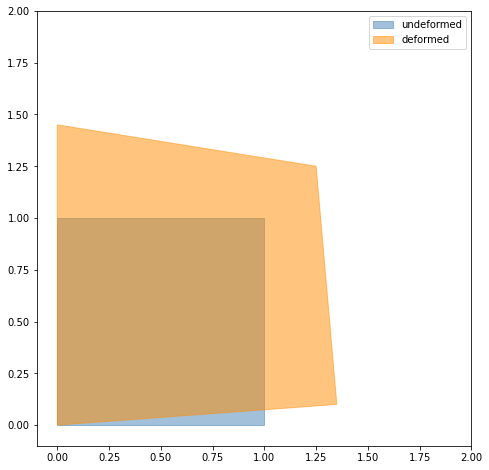

In [25]:
## you may need to adjust the x- and y-limits here:
import matplotlib.patches as patches
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(-0.1, 2.0)
ax.set_ylim(-0.1, 2.0)

# play with these lines and numbers, but
node1 = Node(0.0, 0.0)
node2 = Node(0.0, 1.0)
node3 = Node(1.0, 1.0)
node4 = Node(1.0, 0.0)

element1 = Element()

element1.add_node(node1)
element1.add_node(node2)
element1.add_node(node3)
element1.add_node(node4)

element1.print_nodal_coordinates()

print(element1.get_nodal_coordinates())

ax.add_patch(patches.Polygon(xy=[*element1.get_nodal_coordinates()], color="steelblue", alpha=0.5, label="undeformed"))

element1.nodes[1].add_displacement(0.0, 0.45)
element1.nodes[2].add_displacement(0.25, 0.25)
element1.nodes[3].add_displacement(0.35, 0.1)

element1.print_nodal_coordinates()

print(element1.get_nodal_coordinates())

ax.add_patch(patches.Polygon(xy=[*element1.get_nodal_coordinates()], color="darkorange", alpha=0.5, label="deformed"))

plt.legend()

plt.show()

In [11]:
from random import random
from math import isclose
node1 = Node(0.0, 0.0)
node2 = Node(0.0, 1.0)
node3 = Node(1.0, 1.0)
node4 = Node(1.0, 0.0)
u_r = [random(), random()]
node3.add_displacement(*u_r)
element1 = Element()
element1.add_node(node1)
element1.add_node(node2)
element1.add_node(node3)
element1.add_node(node4)
assert isclose(sum([sum(node.coordinates) for node in element1.nodes]), 4.0 + sum(u_r))

In [12]:
assert type(element1.nodes) == type([])
for node in element1.nodes:
    assert type(node) == type(node1)

---

## Quadratic Forms (3 points)
Let's take a look at how different matrices produce different "distance landscapes". In the cell below, create a function called `qform()` that takes as input a matrix and two vectors (in that order!), then returns the resulting quadratic form. Make it as general as possible (it should also work for 5-dimensional matrices and vectors, for example).

In [27]:
import numpy as np

v1 = np.array([1.0, 1.0, 1.0])
v2 = np.array([0.0, 2.0, 7.0])

A  = np.array([[1.0, 0.0, 0.0], \
               [0.0, 1.0, 0.0], \
               [0.0, 0.0, 1.0]])

### BEGIN SOLUTION HERE
def qform(A, v1, v2):
    return v1.T @ A @ v2
### END SOLUTION HERE

In [28]:
A9, v10, v11 = np.eye(3), np.random.rand(3), np.random.rand(3)
assert qform(A, v10, v11) == v10.T @ v11
assert qform(A9, v10, v10) == v10.T @ v10


As mentioned in the lecture when you have a notion of *length*, you automatically have a notion of *distance* by simply measuring the length of the difference of two vectors $\left|\left|\Delta \mathbf v\right|\right| = \left|\left|\mathbf v_2 - \mathbf v_1\right|\right|$, or, in this case, applying the quadratic form to the difference of two vectors.

Let's see what the qform function does to a variety of 2d vector differences by plotting the resulting value for difference vectors that exist around the origin. For example, if the difference of two vectors is $[1, 1]$, the resulting qform result would show up in the plot at $x = 1, y = 1$.

In the following code, apply your `qform()` function from above to an array of vectors called `vecs`, that is created below:

<IPython.core.display.Javascript object>


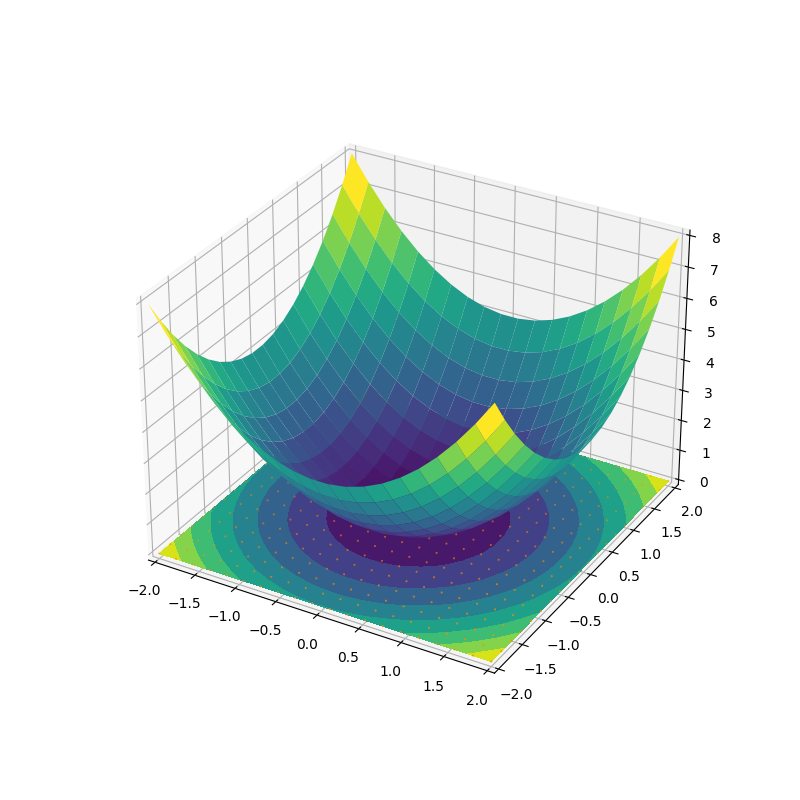

(400,)


In [29]:
# this makes the resulting image a bit more interactive and rotatable in Jupyter
%matplotlib notebook

# from matplotlib, we only need the "pyplot" class
import matplotlib.pyplot as plt
# we need the "axes3d" class for 3d plots, so in 2d, this can be omitted
from mpl_toolkits.mplot3d import axes3d


## define your matrix for the quadratic form here
A = np.array([[1.0, 0.0], \
              [0.0, 1.0]])


# first, a "figure" object needs to be created
fig = plt.figure(figsize=(8,8))


# this is an "axis" object, which you can use to plot.
# the "111" means, that this will only contain a single image
# later, we will use subplots with more figures, where the
# first 2 numbers indicate the number of plots per dimension,
# like "224" would indicate 2 by 2 plots. The last number gives
# the total number of plots.
# "projection='3d'" makes this "axis"-object 3d-capable
ax = fig.add_subplot(111, projection='3d')


# before something can be plotted, we need a space of inputs
mesh_points = np.linspace(-2,2,20)


# to create coordinate matrices out of this space (similar to matlab):
x, y = np.meshgrid(mesh_points, mesh_points)


# we need the vectors of these coordinates for qform to act on
vecs = np.array([x.reshape(400), \
                 y.reshape(400)]).T


# this will plot all our vectors, to see we've done it correctly
ax.scatter(*vecs.T, color='darkorange', s=0.2)


# apply the qform function to the vectors
## instructions: create a variable "q" here, which will contain the results
## of the qform applied on "vecs" using "A". Make it a numpy array. It should have 
## shape (400,)
### BEGIN SOLUTION
q = np.array([qform(A, vec, vec) for vec in vecs])
### END SOLUTION
print(q.shape)


# the plot functions expect matrices, so we have to reshape the results
# to fit the shape of the coordinate arrays x and y
q = q.reshape(20,20)


# this will plot the surface of the action on the vectors
ax.plot_surface(x, y, q, cmap='viridis')


# with this, you can include a projection plot, where "zdir" gives the direction
ax.contourf(x, y, q, zdir='z', offset=0, cmap='viridis')


# you might need to adjust the axes limits
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim( 0, 8)


# this displays the plot on the screen
plt.show()

Feel free to try out a few different matrices and see how that changes the landscape. See for example, what the matrix [[1, 0], [0, -1]] does and how that affects the landscape, or skew it by introducing non-diagonal elements.

## Singular Matrices (3 points)
We can calculate the pseudoinverse even of singular and non-square matrices. Take for example `B` in the following cell and calculate its pseudo-inverse `B_plus`:

In [8]:
import numpy as np

B = np.array([[1.0, 0.5, 1.0], \
              [0.9, 1.0, 0.0], \
              [0.0, 0.0, 0.0]])

print("det(B) =", np.linalg.det(B), "\n\n")

### BEGIN SOLUTION HERE
B_plus = np.linalg.pinv(B)
### END SOLUTION HERE

print(B_plus)

det(B) = 0.0 


[[ 0.26035503  0.29585799  0.        ]
 [-0.23431953  0.73372781  0.        ]
 [ 0.85680473 -0.66272189  0.        ]]


Check that it is indeed the pseudo-inverse here:

In [6]:
print(B @ B_plus)

[[ 1.00000000e+00 -3.33066907e-16  0.00000000e+00]
 [-8.32667268e-17  1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00]]


In [7]:
assert np.allclose(B @ B_plus, np.diag([1, 1, 1])) or \
       np.allclose(B @ B_plus, np.diag([1, 1, 0])) or \
       np.allclose(B @ B_plus, np.diag([1, 0, 0]))

Now let's explore what the action of the singular matrix and its pseudo-inverse on vectors looks like in 3d. Fill in the missing section below:

<IPython.core.display.Javascript object>


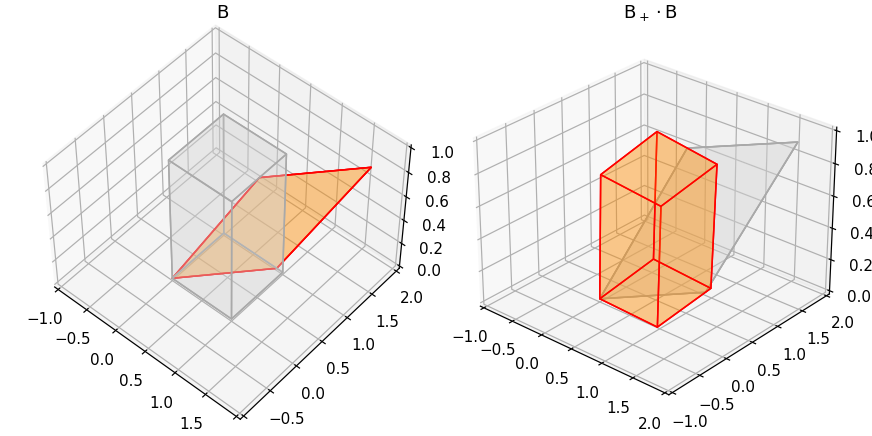

In [9]:
%matplotlib notebook

import matplotlib.patches as patches
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

# this function helps building the vectors for plotting a parallelepiped
def create_parallelepiped_3d(v1, v2, v3):
    origin = np.array([0.0, 0.0, 0.0])
    return [[origin, v1, v1+v2, v2], \
            [v3, v1+v3, v1+v2+v3, v2+v3], \
            [origin, v1, v1+v3, v3], \
            [v1+v2, v2, v2+v3, v1+v2+v3], \
            [v1, v1+v2, v1+v2+v3, v1+v3], \
            [v3, v2+v3, v2, origin]]


# plot setup, this time we will create two plots
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121, projection='3d')
ax1.set_xlim(-1.0, 2.0)
ax1.set_ylim(-1.0, 2.0)
ax1.set_title(label=r"B")
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_xlim(-1.0, 2.0)
ax2.set_ylim(-1.0, 2.0)
ax2.set_title(label=r"B$_+\cdot$B")


# create a matrix of the basis vectors
E_vecs = np.eye(3)

## instructions: create two matrices of vectors similar to "E_vecs", 
## called B_vecs and B_plus_vecs, which contain the resulting vectors
## after applying B, and after applying B_plus*B respectivly to E_vecs
### BEGIN SOLUTION
B_vecs = B @ E_vecs
B_plus_vecs = B_plus @ B_vecs
### END SOLUTION


# create the parallelpipeds
E_rhombus = create_parallelepiped_3d(*E_vecs)
B_rhombus = create_parallelepiped_3d(*B_vecs)
B_plus_rhombus = create_parallelepiped_3d(*B_plus_vecs)


# plot original square
ax1.add_collection3d(Poly3DCollection(E_rhombus, 
     facecolors='lightgray', linewidths=1, edgecolors='darkgray', alpha=.25))
# apply B
ax1.add_collection3d(Poly3DCollection(B_rhombus, 
     facecolors='darkorange', linewidths=1, edgecolors='red', alpha=.25))


# plot B_vecs
ax2.add_collection3d(Poly3DCollection(B_rhombus, 
     facecolors='lightgray', linewidths=1, edgecolors='darkgray', alpha=.25))
# apply B_plus
ax2.add_collection3d(Poly3DCollection(B_plus_rhombus, 
     facecolors='darkorange', linewidths=1, edgecolors='red', alpha=.25))


plt.tight_layout()
plt.show()

If everything worked, you should see that a 3d shape gets reduced to a 2d shape by a singular matrix and hence, that in general, information is lost and cannot be reconstructed even with the pseudoinverse. It's a projection of the original shape onto some 2d subspace of $\mathbb{R}^3$. You will need to rotate the images to see it.

---